<a href="https://colab.research.google.com/github/GALI-SAI-SHANKAR/Threat-Alert-AI/blob/main/Source%20Code/Speech%20Emotion%20Dection/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
from google.colab import files
data = files.upload()

Saving features_rmse_mfcc.csv to features_rmse_mfcc.csv


In [ ]:
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import io


extracted_df = pd.read_csv(io.StringIO(data['features_rmse_mfcc.csv'].decode('utf-8')))

In [ ]:
X = extracted_df.drop(["labels"], axis = 1)
print(X)

              0           1          2          3          4          5  \
0    -333.45926  125.845510 -18.746845  45.997013  -4.752658  19.621078   
1    -365.40643  136.156650 -25.313210  55.117170  -2.410875  21.754911   
2    -312.47485  117.628700 -16.080320  35.369630   0.965076  10.480415   
3    -343.02230  124.052605 -18.814129  45.775803   3.064341  11.891151   
4    -364.39822  125.062386  -9.282014  39.946346  11.061362  12.806195   
...         ...         ...        ...        ...        ...        ...   
7441 -459.24377  135.142490   9.846294  55.432990 -15.009917  40.720780   
7442 -192.61555   92.200130 -69.723015  14.145247 -24.360514   9.543140   
7443 -154.35120   93.259020 -50.075920  40.224754 -42.305400 -27.965569   
7444 -223.75580   91.785200 -41.902930   7.546465 -11.635075  -9.026242   
7445 -208.36876   92.226130 -66.892204  28.852625 -21.457493 -14.400712   

              6          7          8          9  ...        30        31  \
0    -24.528477  -3.38

In [ ]:
X = X.drop(["categorical_label"], axis = 1)
print(X)

In [ ]:
from tensorflow.keras.utils import to_categorical

le = preprocessing.LabelEncoder()
le.fit(extracted_df.labels)
extracted_df['categorical_label'] = le.transform(extracted_df.labels)
Y = extracted_df.categorical_label

Y = to_categorical(Y)

print(extracted_df['labels'].unique())

X = np.array(X)
print(X.shape)
Y = np.array(Y)
X = np.squeeze(X)
X = np.expand_dims(X,-1)
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.05, random_state=42)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad']
(7446, 40)


#Vanilla RNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pyplot

In [ ]:
RNN_model = Sequential([
    SimpleRNN(256,input_shape = (40,1)),
    Dense(128,activation = 'relu', kernel_regularizer= keras.regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(32,activation = 'relu', kernel_regularizer= keras.regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(6,activation='softmax', kernel_regularizer= keras.regularizers.l2(0.001))
])

In [ ]:
RNN_model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
RNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 256)               66048     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 32)                4128      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 6)                 198       
                                                                 
Total params: 103,270
Trainable params: 103,270
Non-tr

In [ ]:
RNN_history = RNN_model.fit(x_train,y_train,validation_data = (x_val,y_val),epochs = 50)

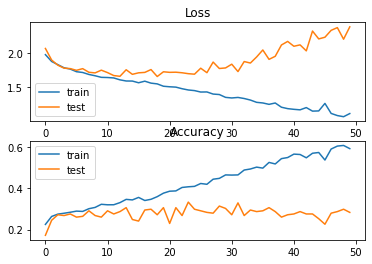

In [ ]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(RNN_history.history['loss'], label='train')
pyplot.plot(RNN_history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(RNN_history.history['accuracy'], label='train')
pyplot.plot(RNN_history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()


In [ ]:
# predict probabilities for test set
RNN_yhat_probs = RNN_model.predict(x_test, verbose=0)
# predict crisp classes for test set
RNN_yhat_classes = np.argmax(RNN_yhat_probs,1)
y_true_classes = np.argmax(y_test,1)

In [ ]:
f1 = f1_score(y_true_classes,RNN_yhat_classes,pos_label='positive',average='micro')
print('F1 score: %f' % f1)

F1 score: 0.304387


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


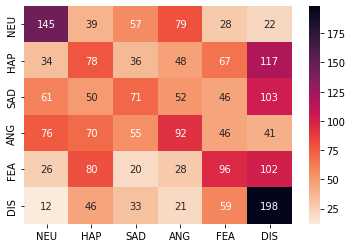

In [ ]:
import seaborn as sns
crema_emotions = {
    'NEU':'neutral',
    'HAP':'happy',
    'SAD':'sad',
    'ANG':'angry',
    'FEA':'fear',
    'DIS':'disgust'}
    
matrix = confusion_matrix(y_true_classes, RNN_yhat_classes)
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = crema_emotions, yticklabels = crema_emotions)

#LSTM

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Dropout
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as pyplot

In [ ]:
import tensorflow.keras as keras
LSTM_model = Sequential([
    LSTM(256,input_shape = (40,1)),
    Dense(128,activation = 'relu', kernel_regularizer= keras.regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(64,activation = 'relu', kernel_regularizer= keras.regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(32,activation = 'relu', kernel_regularizer= keras.regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(6,activation='softmax', kernel_regularizer= keras.regularizers.l2(0.001))
])

In [ ]:
LSTM_model.compile(loss = 'categorical_crossentropy',optimizer = 'adam' , metrics = ['accuracy'])
LSTM_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [ ]:
LSTM_history = LSTM_model.fit(x_train,y_train,validation_data = (x_val,y_val),
                         batch_size = 64,
                         epochs = 50,
                         shuffle = True)

Epoch 1/50
78/78 [==============================] - 18s 189ms/step - loss: 1.9875 - accuracy: 0.1919 - val_loss: 1.8414 - val_accuracy: 0.2797
Epoch 2/50
78/78 [==============================] - 22s 287ms/step - loss: 1.7699 - accuracy: 0.2848 - val_loss: 1.7169 - val_accuracy: 0.3103
Epoch 3/50
78/78 [==============================] - 26s 332ms/step - loss: 1.6831 - accuracy: 0.3125 - val_loss: 1.6096 - val_accuracy: 0.3602
Epoch 4/50
78/78 [==============================] - 17s 214ms/step - loss: 1.6463 - accuracy: 0.3216 - val_loss: 1.5875 - val_accuracy: 0.3716
Epoch 5/50
78/78 [==============================] - 14s 181ms/step - loss: 1.5985 - accuracy: 0.3403 - val_loss: 1.5760 - val_accuracy: 0.3525
Epoch 6/50
78/78 [==============================] - 14s 180ms/step - loss: 1.5893 - accuracy: 0.3401 - val_loss: 1.6632 - val_accuracy: 0.2644
Epoch 7/50
78/78 [==============================] - 14s 180ms/step - loss: 1.5827 - accuracy: 0.3492 - val_loss: 1.5266 - val_accuracy: 0.3755

In [ ]:
LSTM_model.save('SER/models')

INFO:tensorflow:Assets written to: SER/models/assets


INFO:tensorflow:Assets written to: SER/models/assets


In [ ]:
new_model = tf.keras.models.load_model('SER/models')

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [ ]:
!zip -r /content/model.zip /content/SER

  adding: content/SER/ (stored 0%)
  adding: content/SER/models/ (stored 0%)
  adding: content/SER/models/assets/ (stored 0%)
  adding: content/SER/models/keras_metadata.pb (deflated 91%)
  adding: content/SER/models/variables/ (stored 0%)
  adding: content/SER/models/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/SER/models/variables/variables.index (deflated 65%)
  adding: content/SER/models/saved_model.pb (deflated 90%)


In [ ]:
import pickle
pickle.dump(LSTM_model,open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://67d0aff6-fe66-4021-aba5-e3b45079ff50/assets


INFO:tensorflow:Assets written to: ram://67d0aff6-fe66-4021-aba5-e3b45079ff50/assets


In [ ]:
LSTM_model.evaluate(x_test, y_test)

70/70 [==============================] - 3s 41ms/step - loss: 1.5215 - accuracy: 0.4346


[1.5215049982070923, 0.4346463680267334]

In [ ]:
emotions = {
    '0':'angry',
    '1':'disgust',
    '2':'fear',
    '3':'happy',
    '4':'neutral',
    '5':'sad'
}

In [ ]:
print(emotions.get('1'))

disgust


In [ ]:
y_train[1]

array([0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_pred = LSTM_model.predict(x_test)
y_pred[0]

array([4.0537232e-01, 5.0037742e-01, 4.3196278e-03, 8.3301522e-02,
       6.5580769e-03, 7.1028691e-05], dtype=float32)

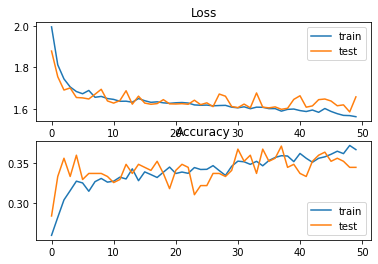

In [ ]:
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(LSTM_history.history['loss'], label='train')
pyplot.plot(LSTM_history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(LSTM_history.history['accuracy'], label='train')
pyplot.plot(LSTM_history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
# predict probabilities for test set
yhat_probs = LSTM_model.predict(x_test, verbose=0)
# predict crisp classes for test set
yhat_classes = np.argmax(yhat_probs,1)
y_true_classes = np.argmax(y_test,1)

In [ ]:
yhat_classes.shape

(2234,)

In [ ]:
y_true_classes.shape
result = []
for i in range(len(y_true_classes)):
  e = str(y_true_classes[i])
  result.append(emotions.get(e))

res = np.array(result)
res.shape
resdf = pd.DataFrame(res)
l = pd.DataFrame(extracted_df['labels']).to_numpy()
l = pd.DataFrame(l)
l['row_num'] = np.arange(len(l))
resdf['row_num'] = np.arange(len(resdf))
result = pd.merge(l, resdf, on="row_num")
print(result)
#result.to_csv('predict.csv')

          0_x  row_num      0_y
0       angry        0    angry
1     disgust        1     fear
2        fear        2  disgust
3       happy        3      sad
4     neutral        4  disgust
...       ...      ...      ...
2229    angry     2229  neutral
2230  disgust     2230     fear
2231     fear     2231      sad
2232    happy     2232    angry
2233  neutral     2233  disgust

[2234 rows x 3 columns]


In [ ]:
f1 = f1_score(y_true_classes,yhat_classes,pos_label='positive'
                                           ,average='micro')
print('F1 score: %f' % f1)

F1 score: 0.434646


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1375: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  UserWarning,


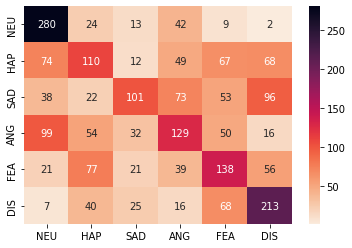

In [ ]:
import seaborn as sns

crema_emotions = {
    'NEU':'neutral',
    'HAP':'happy',
    'SAD':'sad',
    'ANG':'angry',
    'FEA':'fear',
    'DIS':'disgust'}
    

matrix = confusion_matrix(y_true_classes,yhat_classes)
ax = sns.heatmap(matrix, annot=True, fmt="d", cmap = 'rocket_r', xticklabels = crema_emotions, yticklabels = crema_emotions)

In [ ]:
!ls

drive  features_rmse_mfcc.csv  GIRL_bachao_fear.wav  predict.csv  sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy
import numpy as np
import librosa


file = "/content/drive/MyDrive/1001_DFA_HAP_XX.wav"

data, sampling_rate = librosa.load(file)
X = []
mfcc_feature = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T, axis=0)
X.append(mfcc_feature)
MFCCs = numpy.array(X)


In [ ]:
import pickle

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

with open('/content/drive/MyDrive/model.pkl', 'rb') as f:
    model = pickle.load(f)
# print(MFCCs.shape)
p = model.predict(MFCCs,  verbose=0)
yhat_classes = np.argmax(p,1)
output = emotions.get(str(yhat_classes[0]))
print(output)
if output == 'fear':
  print('Fear')

happy


In [ ]:
!pip install SpeechRecognition
!pip install pyttsx3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-pyaudio is already the newest version (0.2.11-1build2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!sudo apt-get install portaudio19-dev python-pyaudio

In [ ]:
!pip install PyAudio

In [ ]:
import speech_recognition as sr
import pyttsx3
import requests


class ThreatAlert:
    @property
    def record_audio(self):
        # Recognizer
        r = sr.Recognizer()
        # speech recognition using Microphone
        with sr.Microphone(device_index=1) as source:
            # Noise cancellation
            r.adjust_for_ambient_noise(source)
            audio = r.listen(source)
            audio_data = ''
            try:
                # speech to text
                audio_data = r.recognize_google(audio)
            except sr.UnknownValueError:
                print('Sorry, I did not get that')
            except sr.RequestError:
                print('Sorry, my speech service is down')
            return audio_data

    def location(self):
        # r = requests.get('https://get.geojs.io/')

        ip_request = requests.get('https://get.geojs.io/v1/ip.json')
        ip_address = ip_request.json()['ip']
        # print(ip_address)

        url = 'https://get.geojs.io/v1/ip/geo/' + ip_address + '.json'
        geo_request = requests.get(url)
        geo_location = geo_request.json()
        print(geo_location)

        Longitude = geo_location['longitude']
        Latitude = geo_location['latitude']
        Organization = geo_location['organization_name']
        City = geo_location['city']
        Region = geo_location['region']
        Country = geo_location['country']

        print('Longitude : ', Longitude)
        print('Latitude : ', Latitude)
        print('Network Provider : ', Organization)
        print('City : ', City)
        print('Region : ', Region)
        print('Country : ', Country)

    def Alert(self):
        # Text to Speech
        engine = pyttsx3.init()
        voices = engine.getProperty('voices')
        engine.setProperty('voice', voices[1].id)

        engine.say('Threat Alert AI sending alert to police')
        engine.runAndWait()
        self.location()

    def Threat(self, Voice_data):
        Voice_data = Voice_data.lower()
        if 'help' in Voice_data:
            self.Alert()
            return True
        elif 'bachao' in Voice_data:
            self.Alert()
            return True
        elif 'raksha in chandi' in Voice_data:
            self.Alert()
            return True


obj = ThreatAlert()
while True:
    print('Listening...')
    voice_data = obj.record_audio
    print(voice_data)
    obj.Threat(voice_data)




ModuleNotFoundError: ignored

In [ ]:
import IPython
IPython.display.Audio('/content/drive/MyDrive/1001_DFA_HAP_XX.wav') 

In [ ]:
!sudo apt-get install python3-pyaudio